In [19]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [21]:
df = pd.read_csv("../Python/Output/UncertaintyNearOne.txt", sep='\t')
df.head()

,X,Input Uncertainty,Order,Expansion Value,Expansion Uncertainty,Expansion ULP,Value Increment,Uncertainty Increment,Error Value,Error Uncertainty,Stable Uncertainty,By Increment,By LSV,Terminated,By Error,By Reminder
0,-0.5,0.0,1,1.0000,0.000000e+00,2.220446e-16,1.0000,0.000000e+00,0.333333,7.014431e-17,False,False,False,False,False,False
1,-0.5,0.0,2,0.5000,9.064901e-17,1.110223e-16,-0.5000,9.064901e-17,-0.166667,1.146188e-16,False,False,False,False,False,False
2,-0.5,0.0,3,0.7500,7.166459e-17,1.110223e-16,0.2500,-1.898442e-17,0.083333,1.002798e-16,False,False,False,False,False,False
3,-0.5,0.0,4,0.6250,8.777065e-17,1.110223e-16,-0.1250,1.610606e-17,-0.041667,1.123562e-16,False,False,False,False,False,False
4,-0.5,0.0,5,0.6875,7.558828e-17,1.110223e-16,0.0625,-1.218237e-17,0.020833,1.031204e-16,False,False,False,False,False,False


In [22]:
df.columns

Index(['X', 'Input Uncertainty', 'Order', 'Expansion Value',
       'Expansion Uncertainty', 'Expansion ULP', 'Value Increment',
       'Uncertainty Increment', 'Error Value', 'Error Uncertainty',
       'Stable Uncertainty', 'By Increment', 'By LSV', 'Terminated',
       'By Error', 'By Reminder'],
      dtype='object')

In [23]:
df['Reminder Precision'] = df['Error Uncertainty'] / df['Expansion Value']

In [24]:
def PlotErrorUncertainty( sX_Noise_Color=((0.6,1e-2,'g'),(0.7,1e-2,'b'),(-0.6,1e-2,'m'),(-0.7,1e-2,'c')),
                          minOrder=0, maxOrder=125, includePrecision=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Reminder for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel('Taylor Expanion Order')
    ax.set_ylabel('Uncertainty or Absolute Value')
    ax.set_yscale('log')
    plt.grid(True)

    if includePrecision:
        ax2 = ax.twinx()
        ax2.set_ylabel('Value Error')
    
    for x, noise, c in sX_Noise_Color:
        dfPlot = df[(df['X']==x) & (df['Input Uncertainty']==noise) & (df['Order']>=minOrder) & (df['Order']<=maxOrder)]

        ax.plot(dfPlot['Order'], dfPlot['Expansion Uncertainty'], f'{c}--', 
                label=f'{x}$\pm${noise} Expansion Uncertainty' if noise else f'{x} Expansion Uncertainty')
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Error Value']), f'{c}-', 
                label=f'{x}$\pm${noise} Reminder Value' if noise else f'{x} Reminder Value')
        ax.plot(dfPlot['Order'], dfPlot['Expansion ULP'], f'{c}:', 
                label=f'{x}$\pm${noise} Expansion LSV' if noise else f'{x} Expansion LSV')
        
        if includePrecision:
            ax2.plot(dfPlot['Order'], dfPlot['Expansion Precision'], f'{c}-', 
                     label=f'{x}$\pm${noise} Expansion Precision' if noise else f'{x} Expansion Precision')
        
        
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    if includePrecision:
        ax2.legend(bbox_to_anchor=(1.8, 0.8))

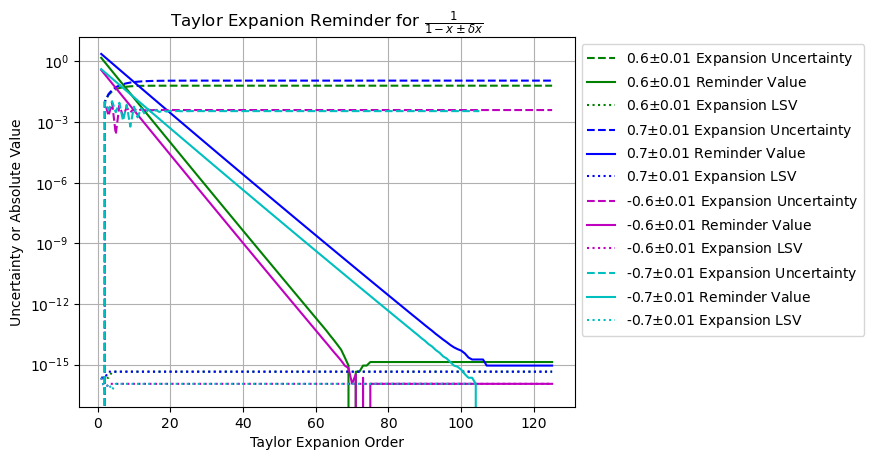

In [25]:
PlotErrorUncertainty()

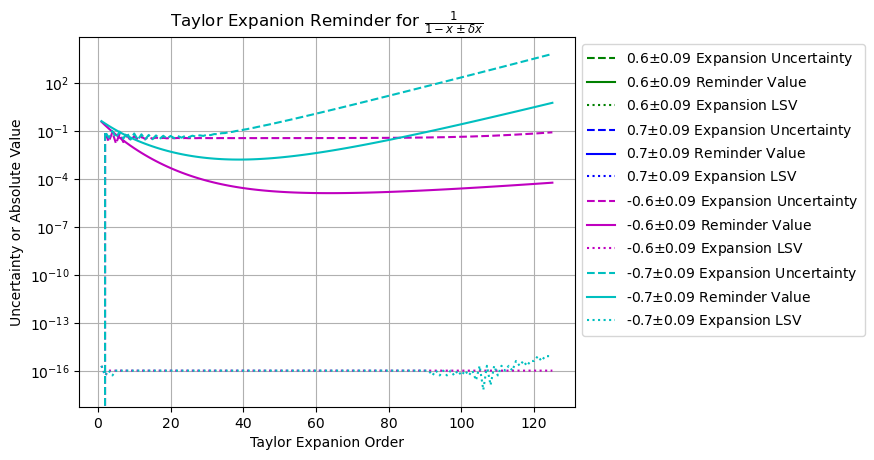

In [26]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,9e-2,'g'),(0.7,9e-2,'b'),(-0.6,9e-2,'m'),(-0.7,9e-2,'c')) )

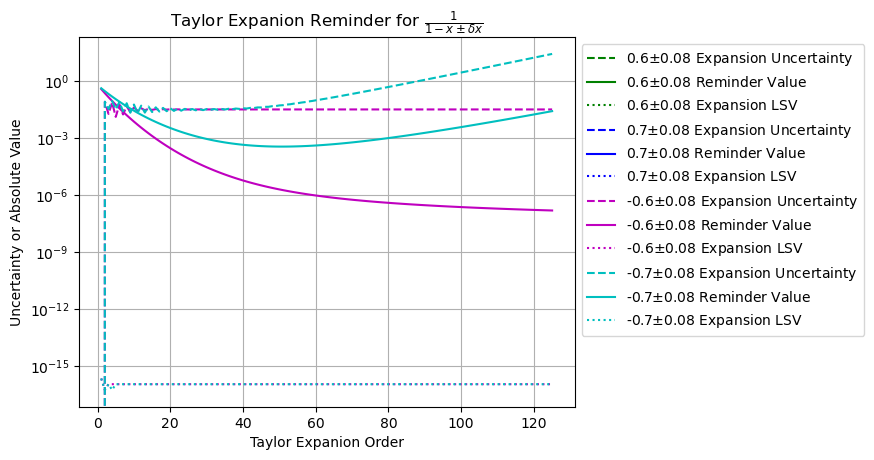

In [27]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,8e-2,'g'),(0.7,8e-2,'b'),(-0.6,8e-2,'m'),(-0.7,8e-2,'c')) )

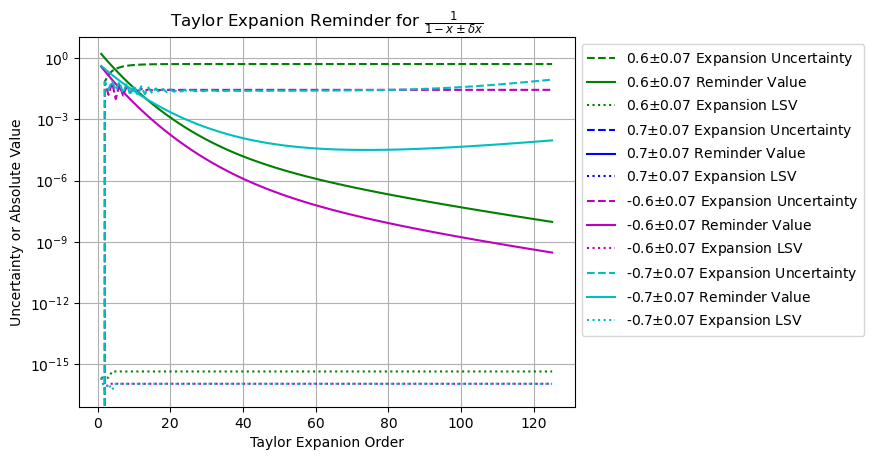

In [28]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,7e-2,'g'),(0.7,7e-2,'b'),(-0.6,7e-2,'m'),(-0.7,7e-2,'c')) )

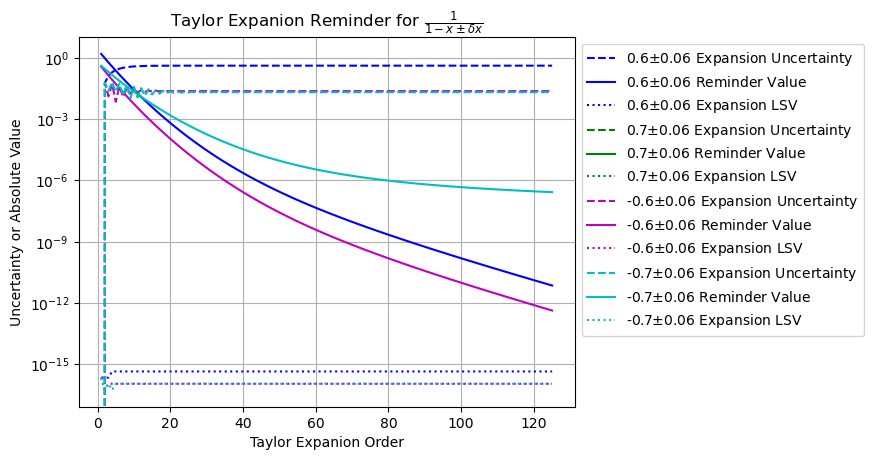

In [29]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,6e-2,'b'),(0.7,6e-2,'g'),(-0.6,6e-2,'m'),(-0.7,6e-2,'c')) )

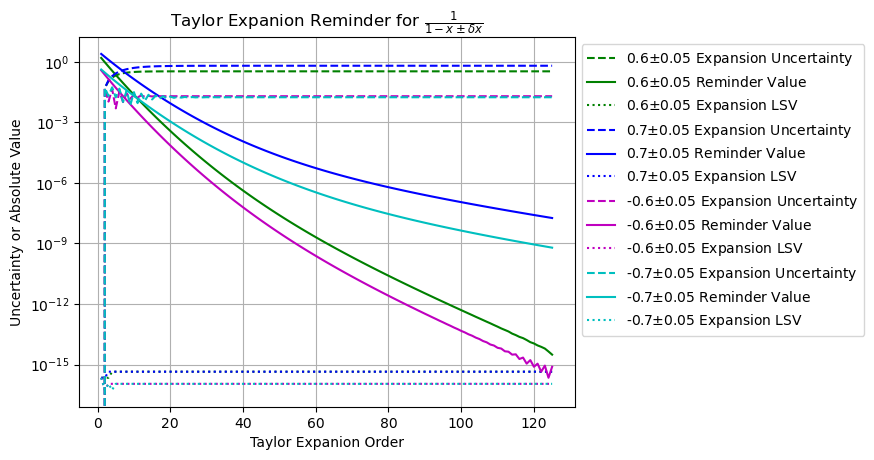

In [30]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,5e-2,'g'),(0.7,5e-2,'b'),(-0.6,5e-2,'m'),(-0.7,5e-2,'c')) )

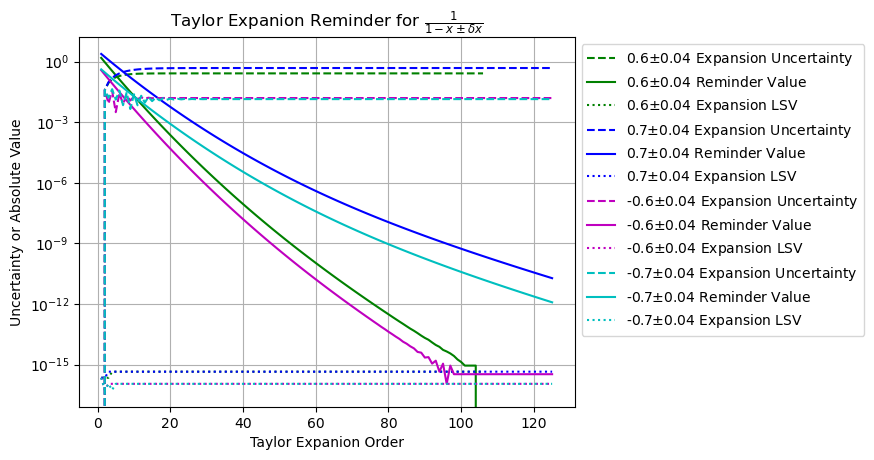

In [31]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,4e-2,'g'),(0.7,4e-2,'b'),(-0.6,4e-2,'m'),(-0.7,4e-2,'c')) )

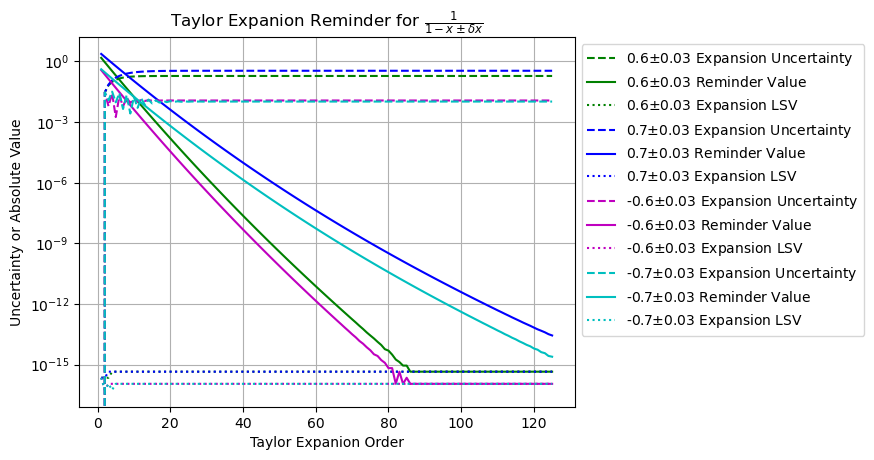

In [32]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,3e-2,'g'),(0.7,3e-2,'b'),(-0.6,3e-2,'m'),(-0.7,3e-2,'c')) )

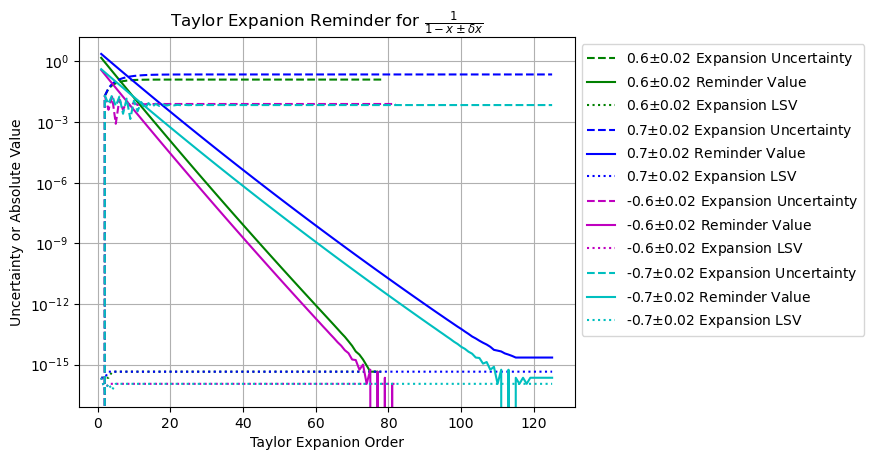

In [33]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,2e-2,'g'),(0.7,2e-2,'b'),(-0.6,2e-2,'m'),(-0.7,2e-2,'c')) )

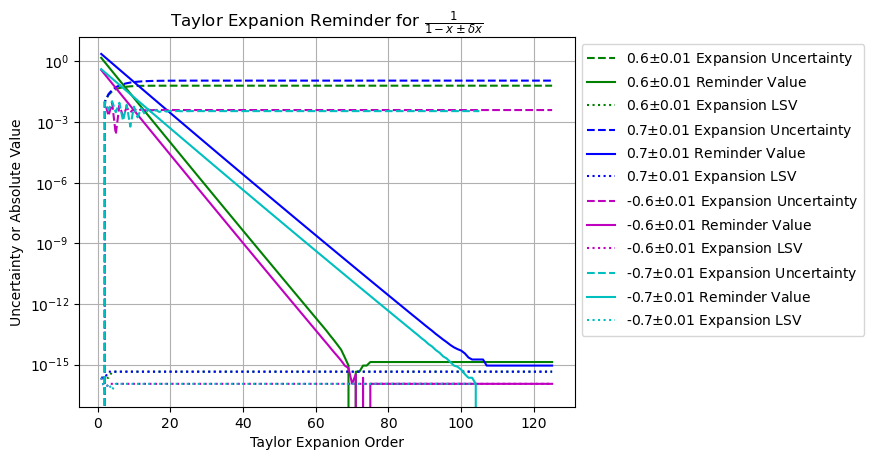

In [34]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,1e-2,'g'),(0.7,1e-2,'b'),(-0.6,1e-2,'m'),(-0.7,1e-2,'c')) )

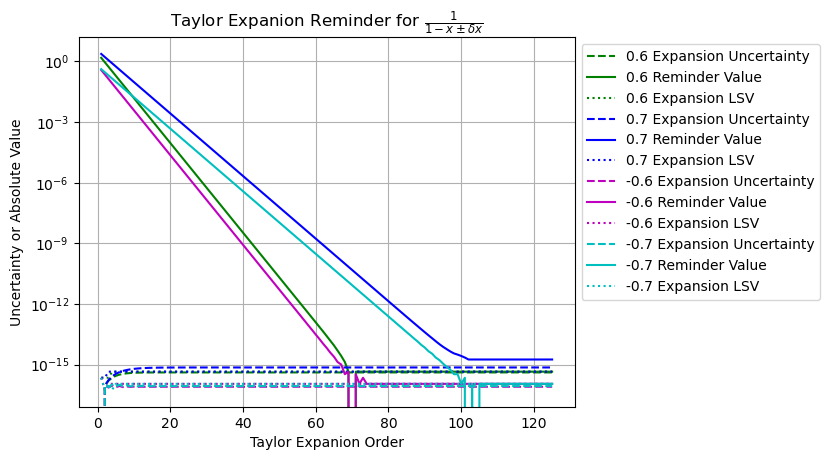

In [35]:
PlotErrorUncertainty(sX_Noise_Color=((0.6,0,'g'),(0.7,0,'b'),(-0.6,0,'m'),(-0.7,0,'c')))

In [69]:
def PlotErrorUncertainty( sX_Noise_Style=((0.6,1e-2,'--'),(0.7,1e-2,'-'),(-0.6,1e-2,':'),(-0.7,1e-2,'-.')),
                          minOrder=0, maxOrder=125):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Reminder for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel('Taylor Expanion Order')
    ax.set_ylabel('Uncertainty or Absolute Value')
    ax.set_yscale('log')
    plt.grid(True)

    for x, noise, style in sX_Noise_Style:
        dfPlot = df[(df['X']==x) & (df['Input Uncertainty']==noise) & (df['Order']>=minOrder) & (df['Order']<=maxOrder)]

        ax.plot(dfPlot['Order'], dfPlot['Expansion Uncertainty'], c='gray', ls=style,
                label=f'{x}$\pm${noise} Expansion Uncertainty' if noise else f'{x} Expansion Uncertainty')
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Error Value']), c='black', ls=style, 
                label=f'{x}$\pm${noise} Reminder Value' if noise else f'{x} Reminder Value')
        ax.plot(dfPlot['Order'], dfPlot['Expansion ULP'], c='lightgray', ls=style, 
                label=f'{x}$\pm${noise} Expansion LSV' if noise else f'{x} Expansion LSV')
        
       
    ax.legend(bbox_to_anchor=(1.0, 1.0))


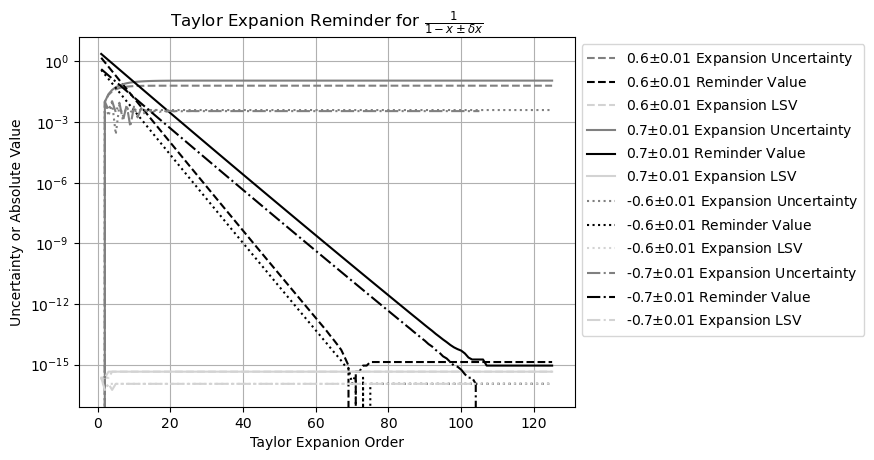

In [70]:
PlotErrorUncertainty()

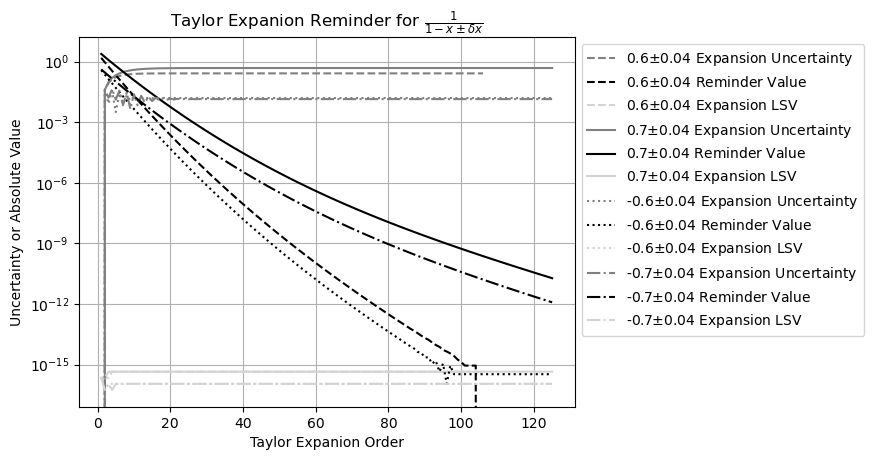

In [71]:
PlotErrorUncertainty(sX_Noise_Style=((0.6,4e-2,'--'),(0.7,4e-2,'-'),(-0.6,4e-2,':'),(-0.7,4e-2,'-.')))

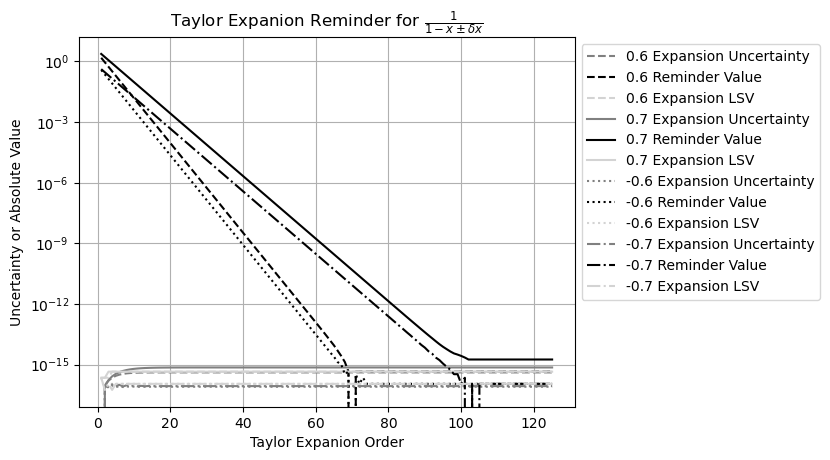

In [72]:
PlotErrorUncertainty(sX_Noise_Style=((0.6,0,'--'),(0.7,0,'-'),(-0.6,0,':'),(-0.7,0,'-.')))

In [36]:
df[(df['By Increment']==True) & (df['X']==0.7) & (df['Input Uncertainty']>0.01)].iloc[0].head()

X                             0.7
Input Uncertainty            0.02
Order                          48
Expansion Value           3.34835
Expansion Uncertainty    0.226291
Name: 9802, dtype: object

In [37]:
df[(df['Terminated']==True) & (df['X']==0.7) & (df['Input Uncertainty']>=0.01)].head()

,X,Input Uncertainty,Order,Expansion Value,Expansion Uncertainty,Expansion ULP,Value Increment,Uncertainty Increment,Error Value,Error Uncertainty,Stable Uncertainty,By Increment,By LSV,Terminated,By Error,By Reminder,Reminder Precision
9552,0.7,0.01,48,3.337049,0.111608,4.440892e-16,6.524388e-08,4.431711e-08,-1.574243e-07,0.157837,False,True,False,True,False,False,0.047298
9803,0.7,0.02,49,3.348350,0.226292,4.440892e-16,8.918205e-08,1.285989e-07,-2.385316e-07,0.320025,True,False,False,True,False,False,0.095577
10057,0.7,0.03,53,3.367720,0.347635,4.440892e-16,8.259023e-08,2.107937e-07,-2.688313e-07,0.491631,True,False,False,True,False,False,0.145983
10315,0.7,0.04,61,3.396074,0.480524,4.440892e-16,6.924690e-08,3.275271e-07,-3.233392e-07,0.679565,True,False,False,True,True,False,0.200103
10590,0.7,0.05,86,3.434995,0.633035,4.440892e-16,3.270720e-08,4.298379e-07,-3.527462e-07,0.895250,True,False,False,True,False,False,0.260626


In [38]:
def PlotTruncationOrder(sX_color=((0.6, 'g'), (0.7, 'b'),(-0.6,'m'),(-0.7,'c')),
                        logx=True, logy=True):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Truncation Order for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    if logx:
        ax.set_xscale('log')
    ax.set_ylabel('Truncation Order')
    if logy:
        ax.set_yscale('log')
    plt.grid(True)

    for x, c in sX_color:
        dfPlot = df[(df['By Reminder']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], f'{c}:', label=f'{x} Reminder LSV')
        dfPlot = df[(df['By Error']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], f'{c}--', label=f'{x} Reminder Error')
        dfPlot = df[(df['Terminated']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], f'{c}-', label=f'{x} Stability')

    ax.legend(bbox_to_anchor=(1.0, 1.0))

In [39]:
def PlotTruncationError(sX_color=((0.6, 'g'), (0.7, 'b'),(-0.6,'m'),(-0.7,'c')),
                        logx=True, displayErrorPrecision=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Truncation Error for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    if logx:
        ax.set_xscale('log')
    ax.set_ylabel('Truncation Error')
    ax.set_yscale('log')
    plt.grid(True)

    for x, c in sX_color:
        dfPlot = df[(df['By Error']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        if displayErrorPrecision:
            ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']) / dfPlot['Error Uncertainty'], 
                    f'{c}--', label=f'{x} By Error')
        else:
            ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']), 
                    f'{c}--', label=f'{x} Reminder Error')
        dfPlot = df[(df['Terminated']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        if displayErrorPrecision:
            ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']) / dfPlot['Error Uncertainty'], 
                    f'{c}-', label=f'{x} Stability')
        else:
            ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']), 
                    f'{c}-', label=f'{x} Stability')
    
    ax.legend(bbox_to_anchor=(1.0, 1.0))

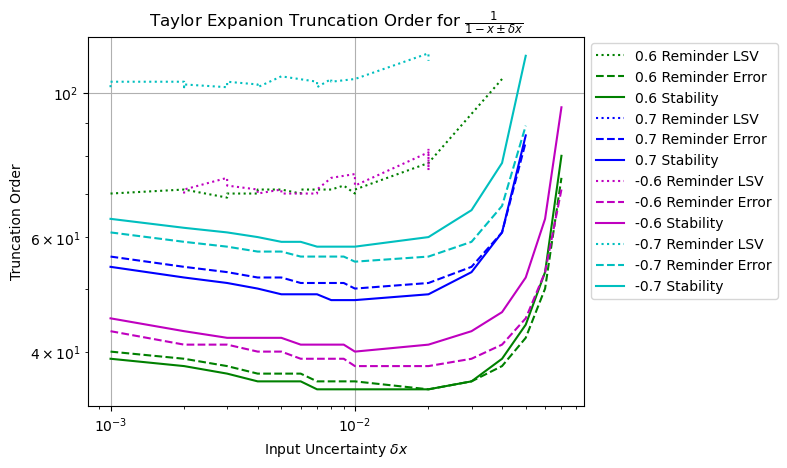

In [40]:
PlotTruncationOrder()

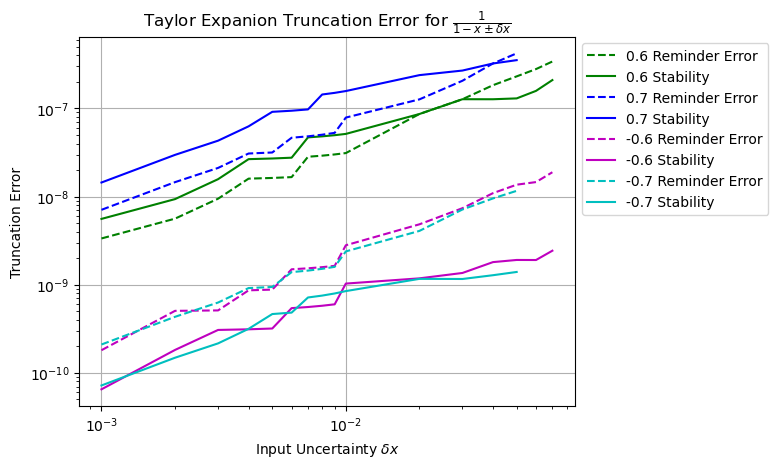

In [41]:
PlotTruncationError()

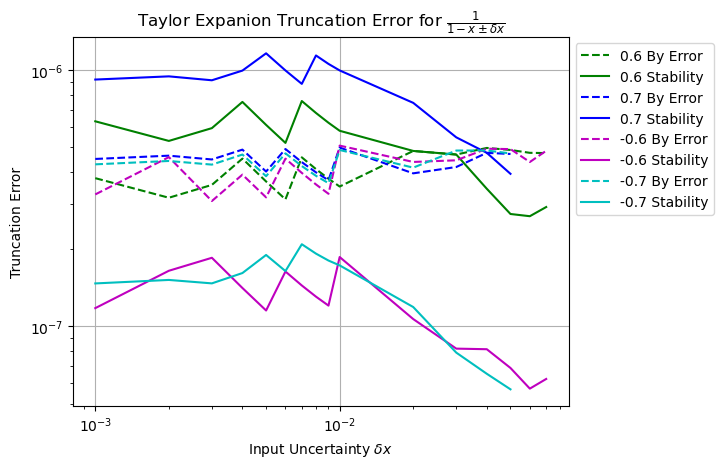

In [42]:
PlotTruncationError(displayErrorPrecision=True)

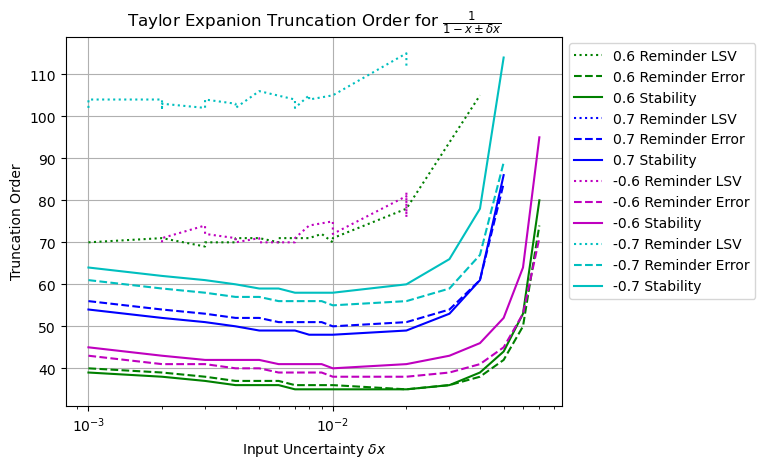

In [43]:
PlotTruncationOrder(logy=False)

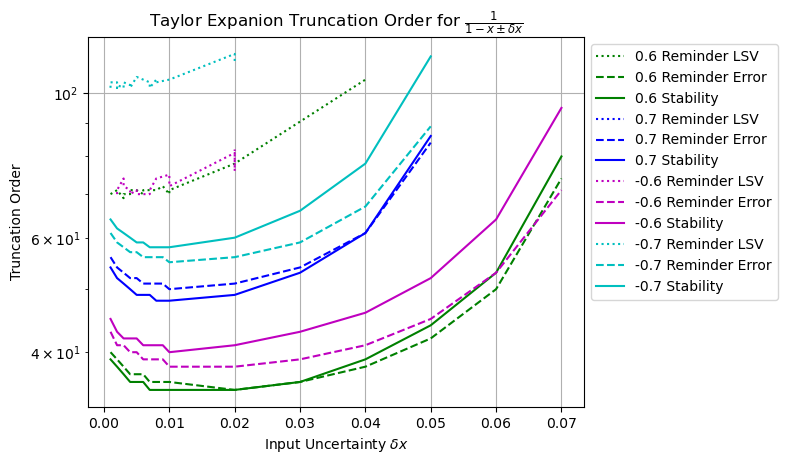

In [44]:
PlotTruncationOrder(logx=False)

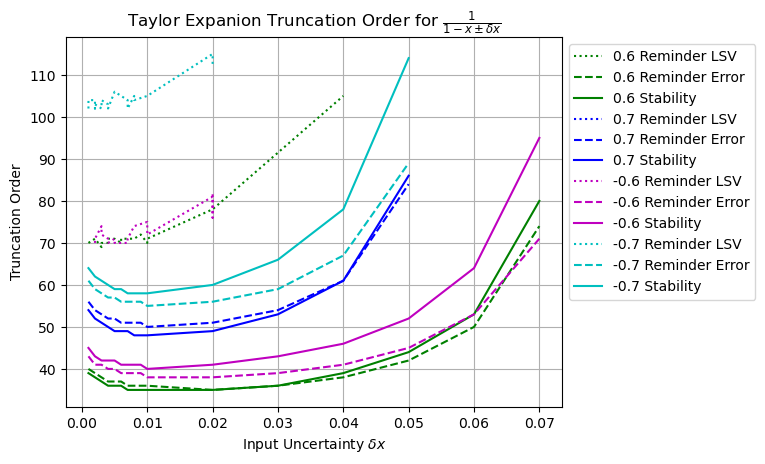

In [45]:
PlotTruncationOrder(logx=False, logy=False)

In [51]:
def PlotTruncationOrder(sX_Style=((0.6, '--'), (0.7, '-'),(-0.6,':'),(-0.7,'-.')),
                        logx=True, logy=True):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Truncation Order for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    if logx:
        ax.set_xscale('log')
    ax.set_ylabel('Truncation Order')
    if logy:
        ax.set_yscale('log')
    plt.grid(True)

    for x, style in sX_Style:
        dfPlot = df[(df['By Reminder']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], c='lightgray', ls=style, label=f'{x} Reminder LSV')
        dfPlot = df[(df['By Error']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], c='gray', ls=style, label=f'{x} Reminder Error')
        dfPlot = df[(df['Terminated']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], dfPlot['Order'], c='black', ls=style, label=f'{x} Stability')

    ax.legend(bbox_to_anchor=(1.0, 1.0))

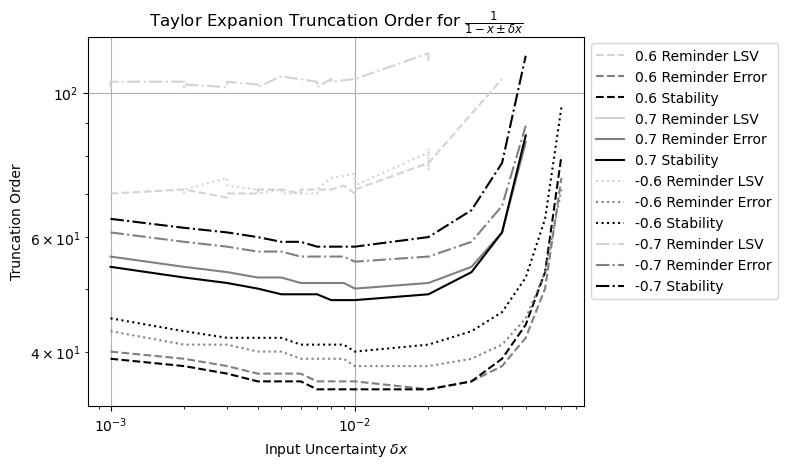

In [52]:
 PlotTruncationOrder()

In [57]:
def PlotTruncationError(sX_Style=((0.6, '--'), (0.7, '-'),(-0.6,':'),(-0.7,'-.')),
                        logx=True):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expanion Truncation Error for $\frac{1}{1 - x \pm \delta x}$')
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    if logx:
        ax.set_xscale('log')
    ax.set_ylabel('Truncation Error')
    ax.set_yscale('log')
    plt.grid(True)

    for x, style in sX_Style:
        dfPlot = df[(df['By Error']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']), c='gray', ls=style, label=f'{x} Reminder Error')
        dfPlot = df[(df['Terminated']==True) & (df['Input Uncertainty']>0) & (df['X']==x)].sort_values('Input Uncertainty')
        ax.plot(dfPlot['Input Uncertainty'], np.abs(dfPlot['Error Value']), c='black', ls=style, label=f'{x} Stability')
    
    ax.legend(bbox_to_anchor=(1.0, 1.0))

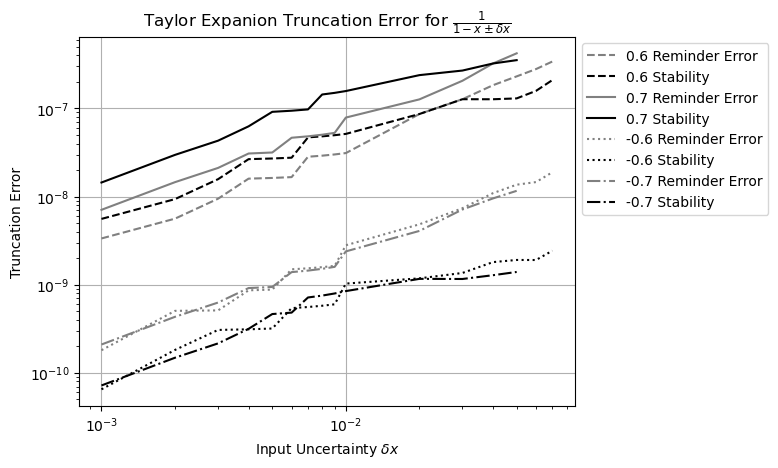

In [58]:
PlotTruncationError()